In [1]:
import os

folder_path = "names"
data_by_year = {}

for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        year_file_name = filename[3:]
        # Extract the year from the filename
        year = int(year_file_name.split('.')[0])

        # Read the file and parse its content
        with open(os.path.join(folder_path, filename), 'r') as file:
            lines = file.readlines()
            data_for_year = [tuple(line.strip().split(',')) for line in lines]
            
            # The third element in each tuple (count) should be an integer
            data_for_year = [(name, gender, int(count)) for name, gender, count in data_for_year]

            # Organize data by gender
            gender_data = {'M': [], 'F': []}
            for name, gender, count in data_for_year:
                gender_data[gender].append((name, count))
            
            # Store the data in the dictionary
            data_by_year[year] = gender_data


In [5]:
!python3 -m pip install numpy


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


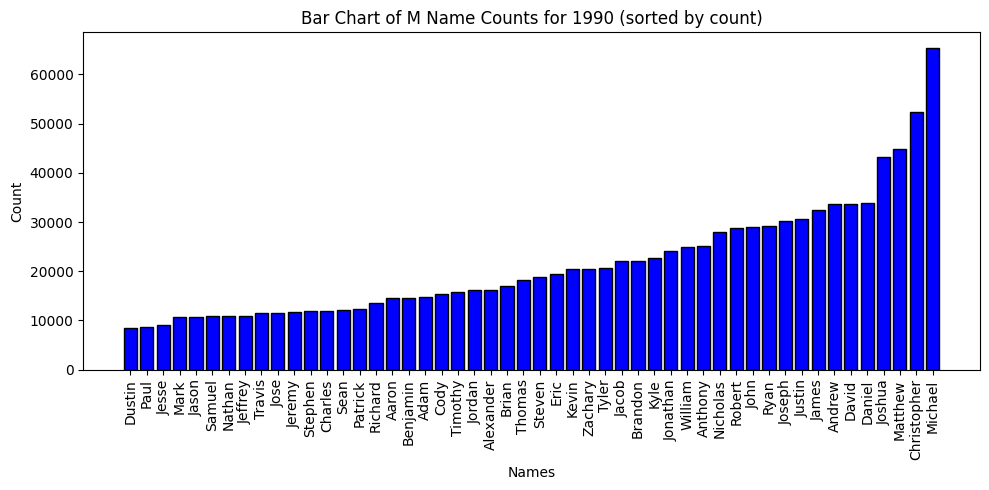

In [6]:
import matplotlib.pyplot as plt

year = 1990
gender = 'M'  # or 'F'

# Extract names and counts for the specified year and gender
names, counts = zip(*sorted(data_by_year[year][gender], key=lambda x: x[1])[-50:])

# Plot a bar chart
plt.figure(figsize=(10,5))  # Adjust size as needed
plt.bar(names, counts, color='blue', edgecolor='black')
plt.title(f"Bar Chart of {gender} Name Counts for {year} (sorted by count)")
plt.xlabel("Names")
plt.ylabel("Count")
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.tight_layout()
plt.show()


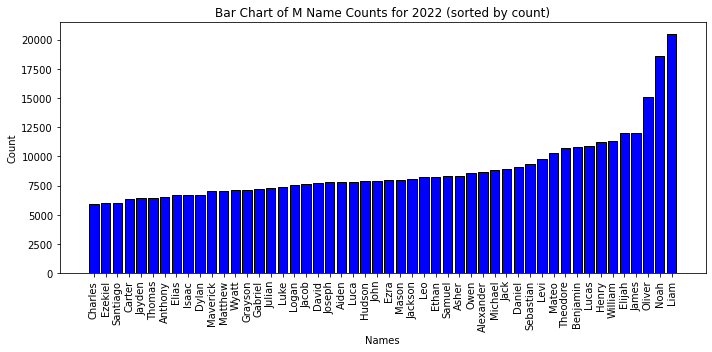

In [14]:
import matplotlib.pyplot as plt

year = 2022
gender = 'M'  # or 'F'

# Extract names and counts for the specified year and gender
names, counts = zip(*sorted(data_by_year[year][gender], key=lambda x: x[1])[-50:])

# Plot a bar chart
plt.figure(figsize=(10,5))  # Adjust size as needed
plt.bar(names, counts, color='blue', edgecolor='black')
plt.title(f"Bar Chart of {gender} Name Counts for {year} (sorted by count)")
plt.xlabel("Names")
plt.ylabel("Count")
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.tight_layout()
plt.show()


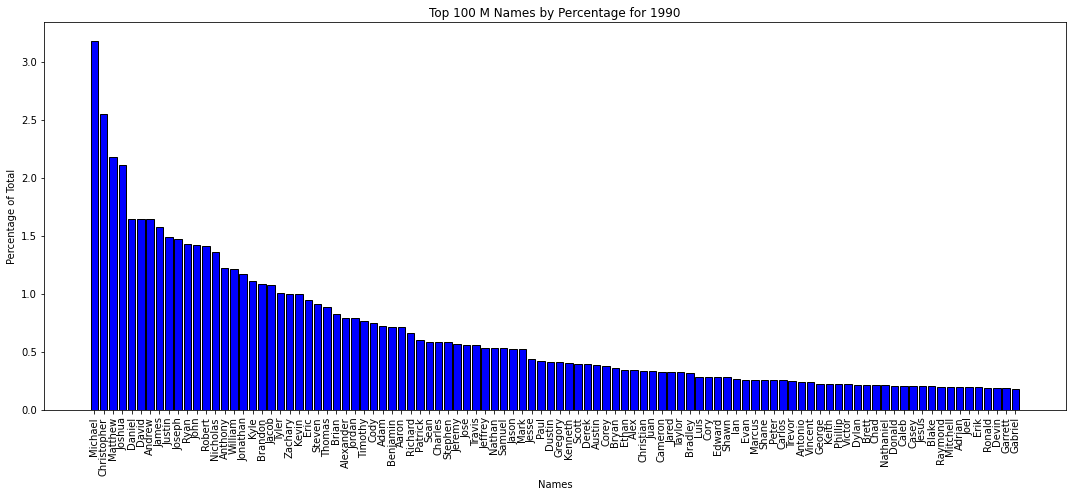

In [15]:
import matplotlib.pyplot as plt

year = 1990
gender = 'M'  # or 'F'

# Extract names and counts for the specified year and gender
names, counts = zip(*data_by_year[year][gender])

# Calculate the total count
total_count = sum(counts)

# Calculate the percentage for each name
percentages = [(name, (count/total_count)*100) for name, count in zip(names, counts)]

# Sort the data by percentages and get the top 100 names
sorted_names, sorted_percentages = zip(*sorted(percentages, key=lambda x: x[1], reverse=True)[:100])

# Plot a bar chart
plt.figure(figsize=(15, 7))  # Adjust size as needed
plt.bar(sorted_names, sorted_percentages, color='blue', edgecolor='black')
plt.title(f"Top 100 {gender} Names by Percentage for {year}")
plt.xlabel("Names")
plt.ylabel("Percentage of Total")
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.tight_layout()
plt.show()


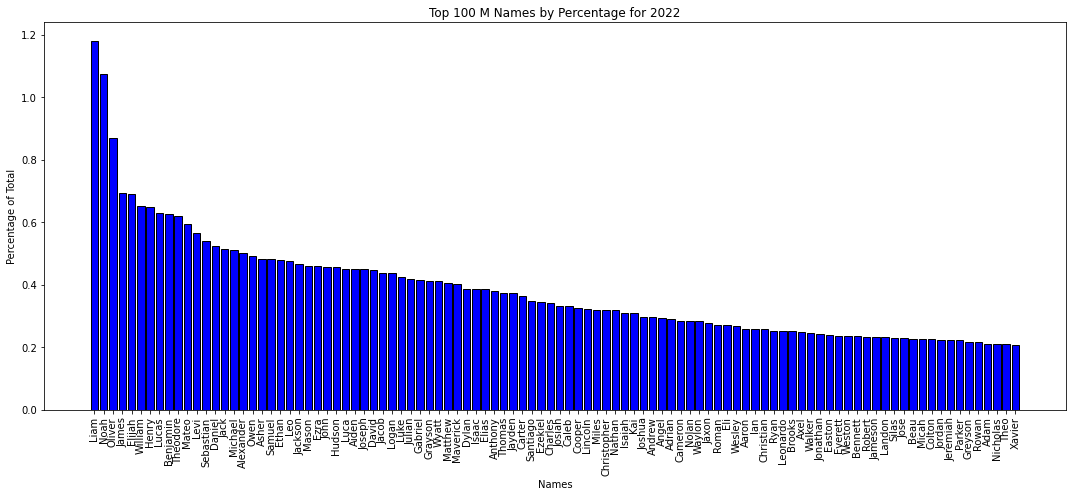

In [17]:
import matplotlib.pyplot as plt

year = 2022
gender = 'M'  # or 'F'

# Extract names and counts for the specified year and gender
names, counts = zip(*data_by_year[year][gender])

# Calculate the total count
total_count = sum(counts)

# Calculate the percentage for each name
percentages = [(name, (count/total_count)*100) for name, count in zip(names, counts)]

# Sort the data by percentages and get the top 100 names
sorted_names, sorted_percentages = zip(*sorted(percentages, key=lambda x: x[1], reverse=True)[:100])

# Plot a bar chart
plt.figure(figsize=(15, 7))  # Adjust size as needed
plt.bar(sorted_names, sorted_percentages, color='blue', edgecolor='black')
plt.title(f"Top 100 {gender} Names by Percentage for {year}")
plt.xlabel("Names")
plt.ylabel("Percentage of Total")
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.tight_layout()
plt.show()


In [60]:
N = 5000
year = 2022
gender = 'M'  # or 'F'

# Extract names and counts for the specified year and gender
names, counts = zip(*data_by_year[year][gender])

# Get the top 300 names based on counts
top_names = [name for name, count in sorted(zip(names, counts), key=lambda x: x[1], reverse=True)[:N]]
import numpy as np
import Levenshtein

distance_matrix = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        distance_matrix[i, j] = Levenshtein.distance(top_names[i], top_names[j])
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=2, min_samples=5, metric='precomputed').fit(distance_matrix)  
labels = db.labels_


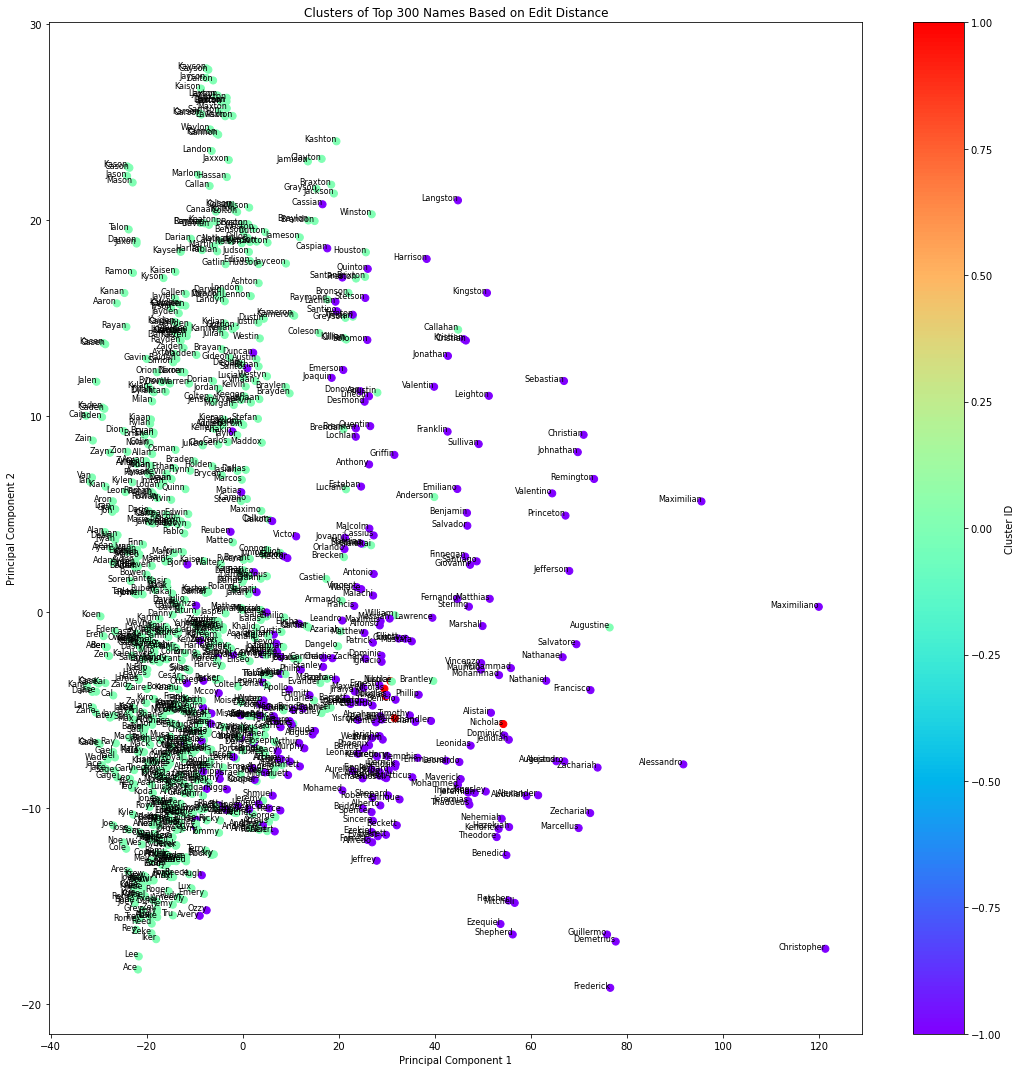

In [44]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions for visualization
pca = PCA(n_components=2)
reduced = pca.fit_transform(distance_matrix)

plt.figure(figsize=(15, 15))
scatter = plt.scatter(reduced[:, 0], reduced[:, 1], c=labels, cmap='rainbow', s=50)  # s adjusts the marker size

# Label each point
for i, name in enumerate(top_names):
    plt.text(reduced[i, 0], reduced[i, 1], name, fontsize=8, ha='right')

plt.title('Clusters of Top 300 Names Based on Edit Distance')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster ID')
plt.tight_layout()
plt.show()


In [62]:
import fuzzy
# Calculate phonetic distance
soundex = fuzzy.Soundex(4)
top_names_phonetic = [soundex(name) for name in top_names]

distance_matrix_phonetic = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        distance_matrix_phonetic[i, j] = Levenshtein.distance(top_names_phonetic[i], top_names_phonetic[j])

# Calculate regular edit distance
# distance_matrix_edit = np.zeros((N,N))
# for i in range(N):
#     for j in range(N):
#         distance_matrix_edit[i, j] = Levenshtein.distance(top_names[i], top_names[j])

# Combine the two distances
combined_distance_matrix = distance_matrix_phonetic #+ distance_matrix_edit


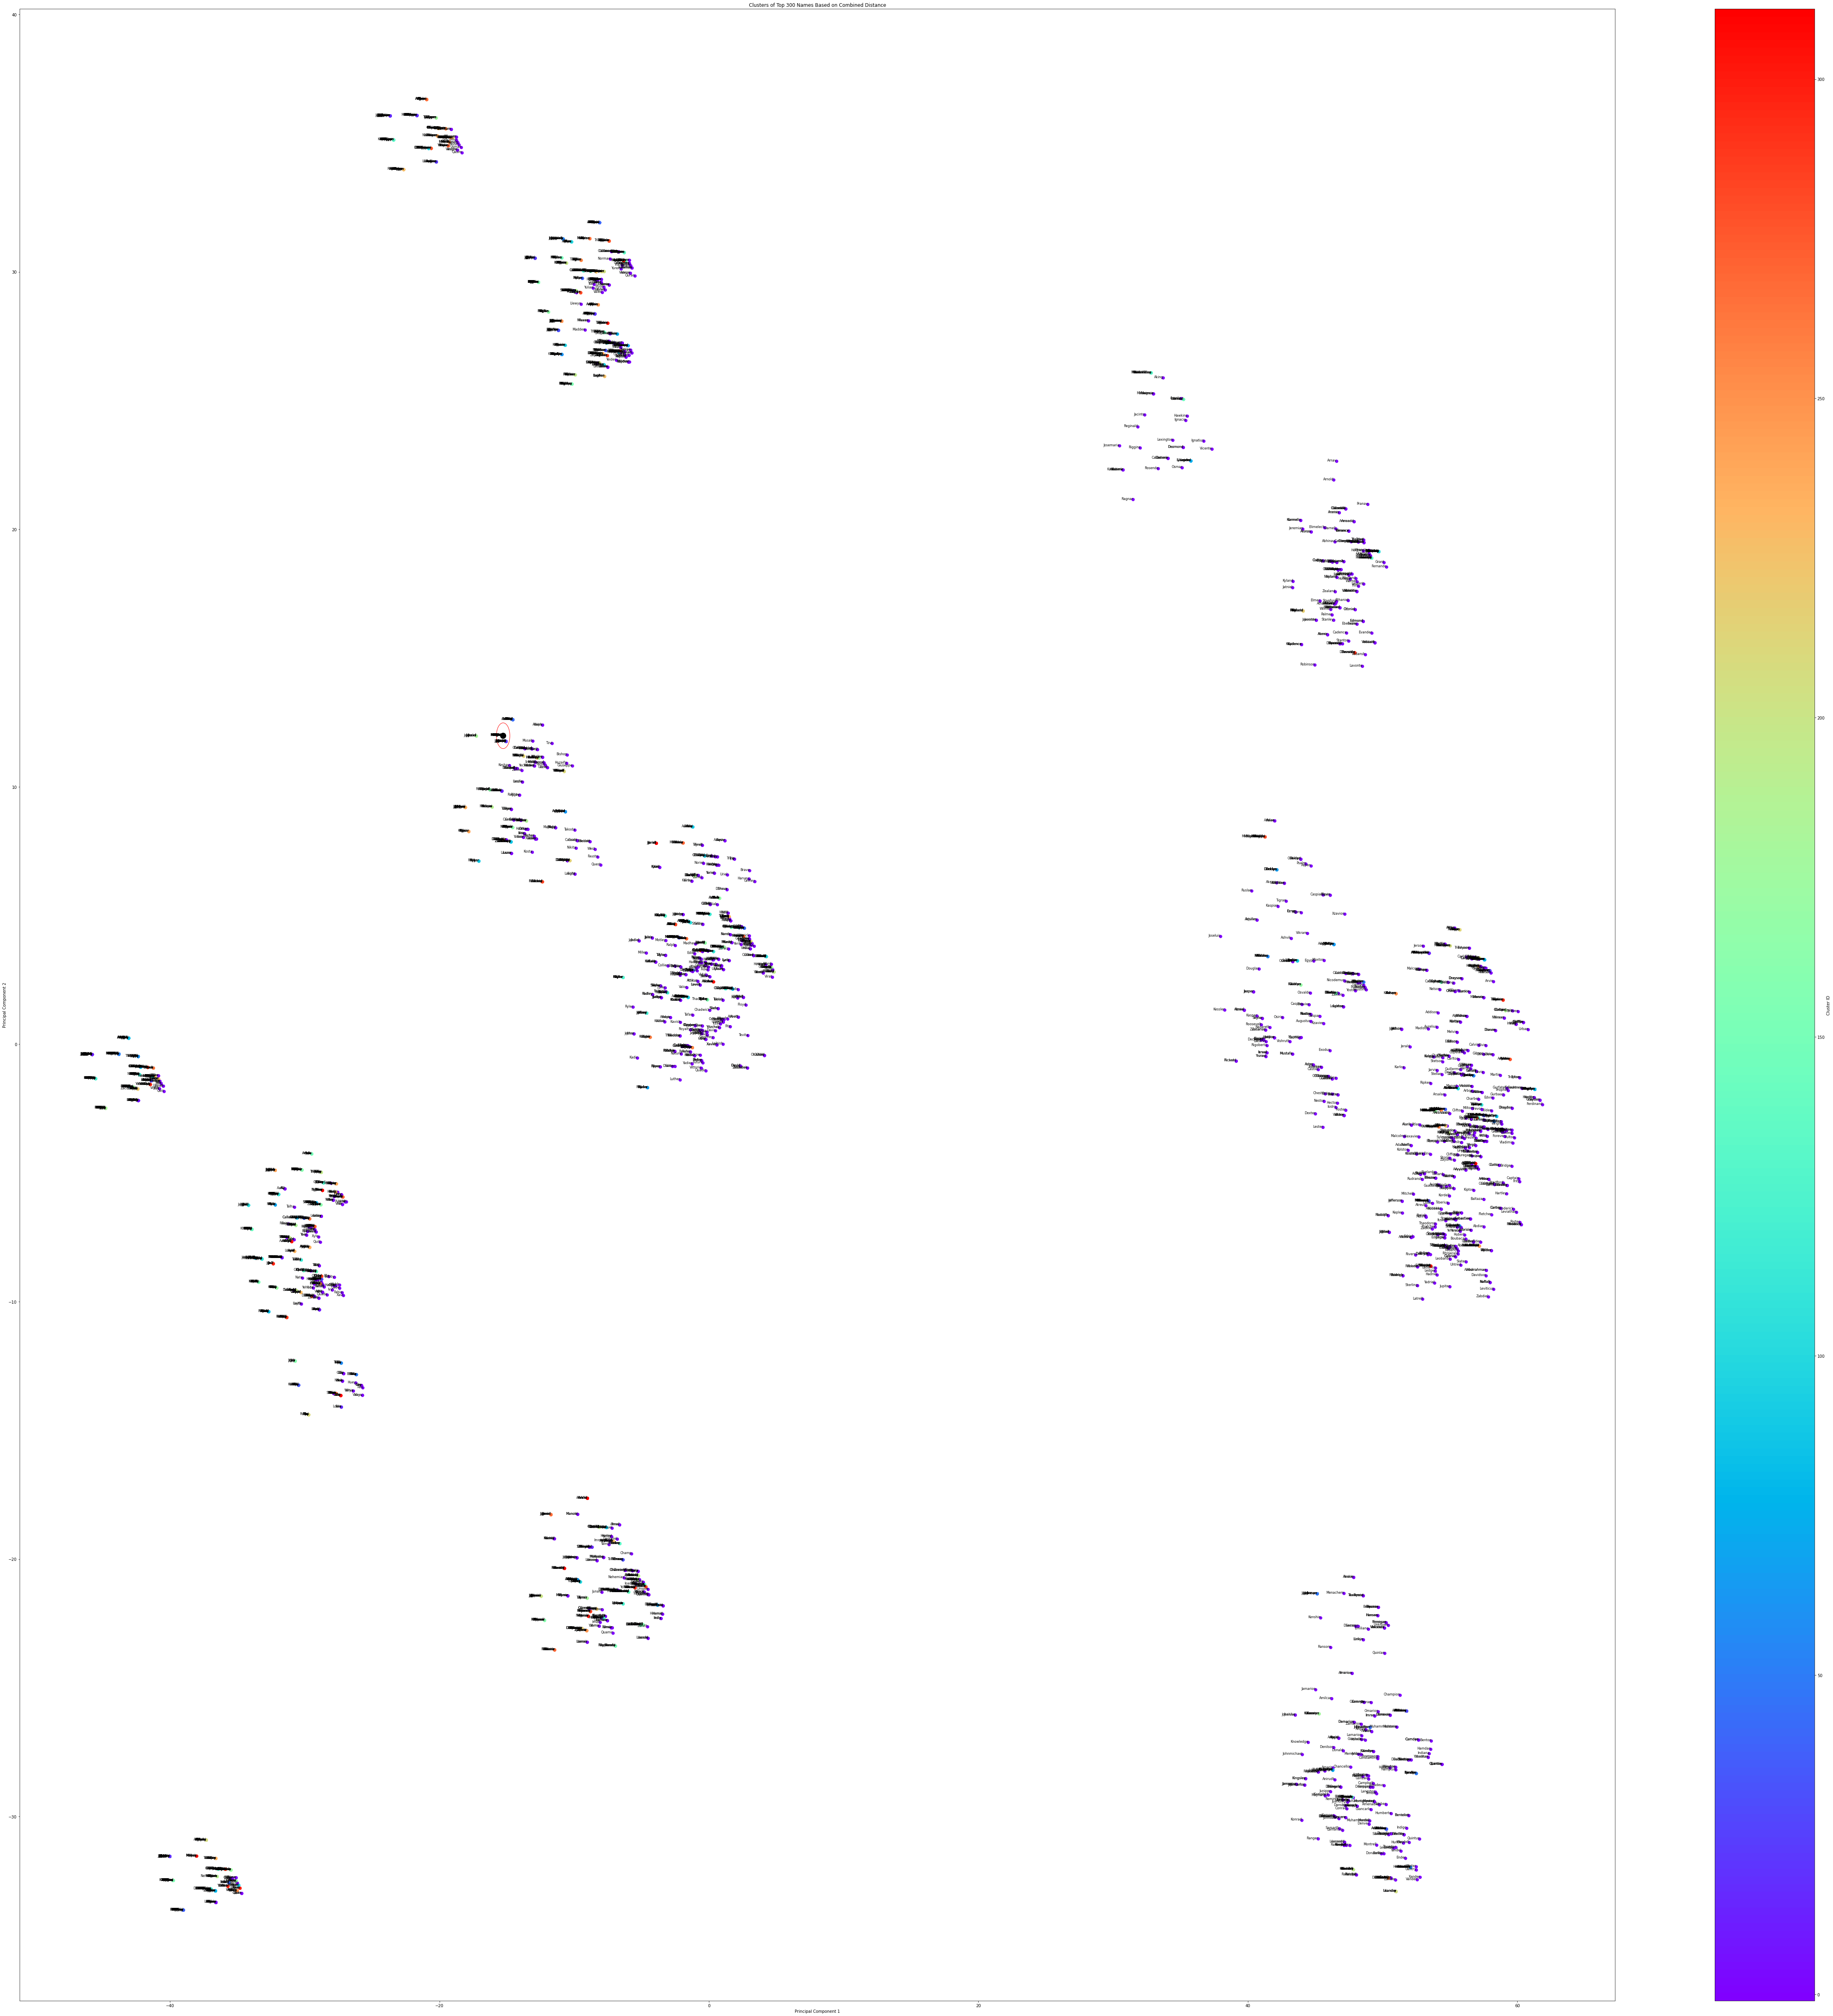

In [63]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Cluster using DBSCAN
db = DBSCAN(eps=0.3, min_samples=5, metric='precomputed').fit(combined_distance_matrix)
labels = db.labels_

# Reduce dimensions for visualization
pca = PCA(n_components=2)
reduced = pca.fit_transform(combined_distance_matrix)

# Visualize the clusters
plt.figure(figsize=(70, 70))
scatter = plt.scatter(reduced[:, 0], reduced[:, 1], c=labels, cmap='rainbow', s=50)

# Label each point and highlight "Michael"
for i, name in enumerate(top_names):
    plt.text(reduced[i, 0], reduced[i, 1], name, fontsize=8, ha='right')
    if name == "Michael":
        plt.scatter(reduced[i, 0], reduced[i, 1], color='black', s=200)  # Make "Michael" black and larger
        plt.gca().add_artist(plt.Circle((reduced[i, 0], reduced[i, 1]), 0.5, color='red', fill=False))  # Add a red circle around "Michael"

plt.title('Clusters of Top 300 Names Based on Combined Distance')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster ID')
plt.tight_layout()
plt.show()


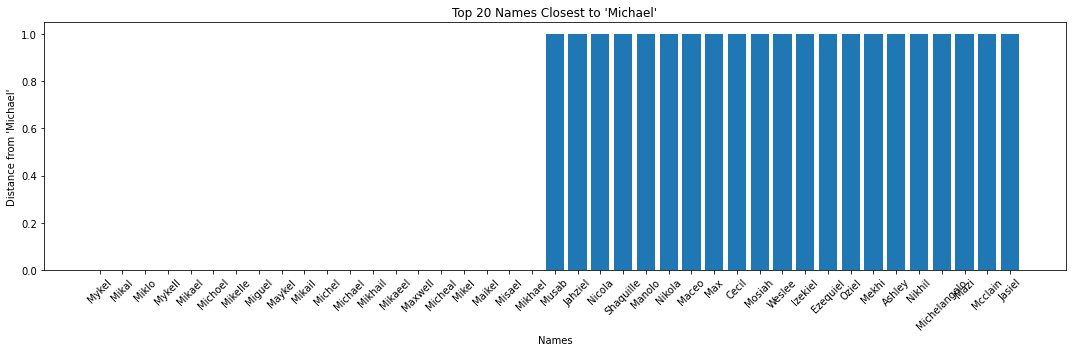

In [65]:
import matplotlib.pyplot as plt

# Find the index of "Michael" in the top_names list
michael_index = top_names.index("Michael")

# Extract distances from "Michael" to all other names
distances_from_michael = combined_distance_matrix[michael_index]

# Get the sorted indices based on distances
sorted_indices = np.argsort(distances_from_michael)


sorted_distances = distances_from_michael[sorted_indices][:41]  # Only the top 20 + Michael
sorted_names = [top_names[i] for i in sorted_indices[:41]]      # Only the top 20 + Michael

# Plot
plt.figure(figsize=(15, 5))
plt.bar(sorted_names, sorted_distances)
plt.xlabel("Names")
plt.ylabel("Distance from 'Michael'")
plt.title("Top 20 Names Closest to 'Michael'")
plt.xticks(rotation=45)  # Adjust rotation for better legibility
plt.tight_layout()
plt.show()


# proportion vectors
# 1. michael got less popular
# 2. another name got more popular "jack"
# 3. 


# compositional data
# rocks
# transform the proportional vectors to normalize them
# make distinguishing
# John Aitchison


# transform them and build time series models



# sta